---
title: "Correlation of Enformer CAGE predictions and observed expression across all rn7 genes"
author: "Sabrina Mi"
description: "We calculate correlation for two comparisons: (1) Enformer predictions on rn7 reference genome against average gene expression in the Brain study and (2) Enformer predictions for a small sample of rats against their individual gene expression."
date: "8/15/23"
---


## Reference Genome

### Read in expression files

In [53]:
import os
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tpm = pd.read_csv("/home/s1mi/enformer_rat_data/Brain.rn7.expr.tpm.bed", sep="\t", header=0, index_col='gene_id')
tpm.head()

/tmp/ipykernel_177767/849308874.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  tpm = pd.read_csv("/home/s1mi/enformer_rat_data/Brain.rn7.expr.tpm.bed", sep="\t", header=0, index_col='gene_id')


,#chr,start,end,000789972A,0007899884,000789FF64,00079298B1,00079299B5,0007929A79,0007929B36,...,0007899761,0007899866,00078A00E6,0007929938,0007929956,00079FF7D6,0007899826,0007929917,00077E82E3,00078A18A7
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSRNOG00000065394,1,31563,31564,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
ENSRNOG00000065356,1,41634,41635,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
ENSRNOG00000070568,1,76833,76834,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0
ENSRNOG00000065706,1,184235,184236,0.0,0.0,0.0,0.0,0.18,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
ENSRNOG00000069644,1,272252,272253,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0


In [4]:
iqn = pd.read_csv("/home/s1mi/enformer_rat_data/Brain.rn7.expr.iqn.bed", sep="\t", header=0, index_col='gene_id')
iqn.head()

/tmp/ipykernel_177767/3212824497.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  iqn = pd.read_csv("/home/s1mi/enformer_rat_data/Brain.rn7.expr.iqn.bed", sep="\t", header=0, index_col='gene_id')


,#chr,start,end,000789972A,0007899884,000789FF64,00079298B1,00079299B5,0007929A79,0007929B36,...,0007899761,0007899866,00078A00E6,0007929938,0007929956,00079FF7D6,0007899826,0007929917,00077E82E3,00078A18A7
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSRNOG00000065394,1,31563,31564,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSRNOG00000065356,1,41634,41635,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSRNOG00000070568,1,76833,76834,-0.095706,-0.095706,-0.095706,-0.095706,-0.095706,-0.095706,-0.095706,...,-0.095706,-0.095706,-0.095706,-0.095706,-0.095706,1.890800,-0.095706,-0.095706,-0.095706,-0.095706
ENSRNOG00000065706,1,184235,184236,-0.025731,-0.025731,-0.025731,-0.025731,2.042970,-0.025731,-0.025731,...,-0.025731,-0.025731,-0.025731,-0.025731,-0.025731,-0.025731,-0.025731,-0.025731,-0.025731,-0.025731
ENSRNOG00000069644,1,272252,272253,-0.011026,-0.011026,-0.011026,-0.011026,-0.011026,-0.011026,-0.011026,...,-0.011026,-0.011026,-0.011026,-0.011026,-0.011026,-0.011026,-0.011026,-0.011026,-0.011026,-0.011026


### Calculate average gene expression

In [8]:
mean_tpm = tpm.iloc[:,3:].mean(axis=1)
print(mean_tpm)

gene_id
ENSRNOG00000065394    0.000000
ENSRNOG00000065356    0.000000
ENSRNOG00000070568    0.000912
ENSRNOG00000065706    0.005029
ENSRNOG00000069644    0.000265
                        ...   
ENSRNOG00000067420    0.000000
ENSRNOG00000069298    0.000559
ENSRNOG00000066131    0.000529
ENSRNOG00000068239    0.000500
ENSRNOG00000069552    0.001088
Length: 30231, dtype: float64


In [9]:
mean_iqn = iqn.iloc[:,3:].mean(axis=1)
print(mean_iqn)

gene_id
ENSRNOG00000065394    0.000000
ENSRNOG00000065356    0.000000
ENSRNOG00000070568    0.052617
ENSRNOG00000065706    0.022574
ENSRNOG00000069644    0.011569
                        ...   
ENSRNOG00000067420    0.000000
ENSRNOG00000069298    0.004439
ENSRNOG00000066131    0.008208
ENSRNOG00000068239    0.004439
ENSRNOG00000069552    0.017464
Length: 30231, dtype: float64


In [30]:
## Put both means into dataframe
corr_df = pd.DataFrame({'tpm': mean_tpm, 'iqn': mean_iqn, 'predicted': np.full(30231, np.nan), 'chr': np.full(30231, np.nan)})
corr_df.head()

,tpm,iqn,predicted,chr
gene_id,,,,
ENSRNOG00000065394,0.000000,0.000000,NaN,NaN
ENSRNOG00000065356,0.000000,0.000000,NaN,NaN
ENSRNOG00000070568,0.000912,0.052617,NaN,NaN
ENSRNOG00000065706,0.005029,0.022574,NaN,NaN
ENSRNOG00000069644,0.000265,0.011569,NaN,NaN


### Calculate gene expression from Enformer predictions on reference genome

In [26]:
reference_predictions="/home/s1mi/Br_predictions/predictions_folder/reference_Br_all_genes/predictions_2023-08-11/enformer_predictions/reference_Br/haplotype0"

annot_df = pd.read_csv('/home/s1mi/enformer_rat_data/annotation/rn7.gene.txt', sep ='\t',  index_col='geneId')
annot_df.head(3)

/tmp/ipykernel_177767/3273646084.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  annot_df = pd.read_csv('/home/s1mi/enformer_rat_data/annotation/rn7.gene.txt', sep ='\t',  index_col='geneId')


,geneSymbol,chromosome,start,end,strand,tss,description,hasEqtl,expr_BLA,expr_Brain,...,sqtl_BLA,sqtl_Brain,sqtl_Eye,sqtl_IL,sqtl_LHb,sqtl_NAcc,sqtl_NAcc2,sqtl_OFC,sqtl_PL,sqtl_PL2
geneId,,,,,,,,,,,,,,,,,,,,,
ENSRNOG00000066169,ENSRNOG00000066169,1,36112690,36122387,-,36122387,NaN,True,True,True,...,False,False,False,False,False,False,False,False,False,False
ENSRNOG00000070168,Olr56,1,157231467,157232417,+,157231467,olfactory receptor family 51 subfamily F membe...,True,False,True,...,False,False,False,False,False,False,False,False,False,False
ENSRNOG00000070901,Irgq,1,80123925,80131881,+,80123925,immunity-related GTPase Q,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [49]:
for gene in corr_df.index:
    gene_annot = annot_df.loc[gene]
    corr_df['chr'].loc[gene] = gene_annot['chromosome']
    interval = f"chr{gene_annot['chromosome']}_{gene_annot['tss']}_{gene_annot['tss']}"
    path = os.path.join(predictions_dir, f"{interval}_predictions.h5")
    if os.path.isfile(path):
        predictions = h5py.File(path, "r")
        pred_expr = np.average(predictions[interval][446:450, 4980])
        corr_df['predicted'].loc[gene] = pred_expr
    else:
        continue

print(corr_df)
corr_df.dropna().to_csv("reference_epigenome_predicted_vs_observed.csv", index=True)

/tmp/ipykernel_177767/3766832847.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['predicted'].loc[gene] = pred_expr


                         tpm       iqn  predicted chr
gene_id                                              
ENSRNOG00000065394  0.000000  0.000000   0.002946   1
ENSRNOG00000065356  0.000000  0.000000   0.004051   1
ENSRNOG00000070568  0.000912  0.052617   0.003553   1
ENSRNOG00000065706  0.005029  0.022574   0.005847   1
ENSRNOG00000069644  0.000265  0.011569   0.001334   1
...                      ...       ...        ...  ..
ENSRNOG00000067420  0.000000  0.000000   0.001928   Y
ENSRNOG00000069298  0.000559  0.004439   0.003280   Y
ENSRNOG00000066131  0.000529  0.008208   0.003569   Y
ENSRNOG00000068239  0.000500  0.004439   0.001887   Y
ENSRNOG00000069552  0.001088  0.017464   0.001822   Y

[30231 rows x 4 columns]


                         tpm           iqn  predicted chr
gene_id                                                  
ENSRNOG00000065394  0.000000  0.000000e+00   0.002946   1
ENSRNOG00000065356  0.000000  0.000000e+00   0.004051   1
ENSRNOG00000070568  0.000912  5.261717e-02   0.003553   1
ENSRNOG00000065706  0.005029  2.257399e-02   0.005847   1
ENSRNOG00000069644  0.000265  1.156919e-02   0.001334   1
...                      ...           ...        ...  ..
ENSRNOG00000068563  2.707324  4.484265e-04   0.003213   9
ENSRNOG00000063904  2.328647  2.241176e-07   0.003717   9
ENSRNOG00000063563  2.356941 -6.705882e-07   0.015298   9
ENSRNOG00000069207  0.132353  4.173573e-02   0.008909   9
ENSRNOG00000063040  0.664765 -2.323529e-07   0.291883   9

[11277 rows x 4 columns]
[1 13 14 17 2 3 4 9]


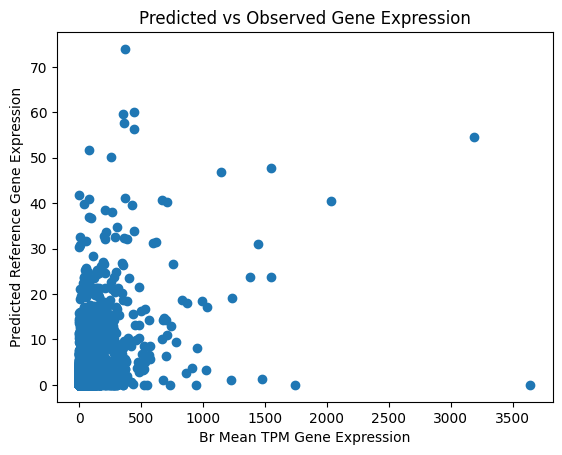

In [65]:
# Drop rows with NaN values
corr_df = corr_df.dropna()

# Subset to autosomal genes
subset_df = corr_df[corr_df['chr'].apply(lambda x: type(x) is int)]
print(subset_df)
print(subset_df['chr'].unique())

# Create a scatter plot with colors based on column z
plt.scatter(subset_df['tpm'], subset_df['predicted'])

# Set labels and title
plt.xlabel('Br Mean TPM Gene Expression')
plt.ylabel('Predicted Reference Gene Expression')
plt.title('Predicted vs Observed Gene Expression')

# Show the plot
plt.show()
